# Problem 6 - Deep Neural Network with Keras

## 1. Data loading

I am not splitting the training data for making a validation dataset since **keras.model.fit** has a built-in `validation_split` argument.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

assert train_images.shape == (60000, 28, 28)
assert train_labels.shape == (60000,)
assert test_images.shape == (10000, 28, 28)
assert test_labels.shape == (10000,)

## 2. Handwritten digits visualization

The first 100 images are visualized in the following 10 by 10 subplot.

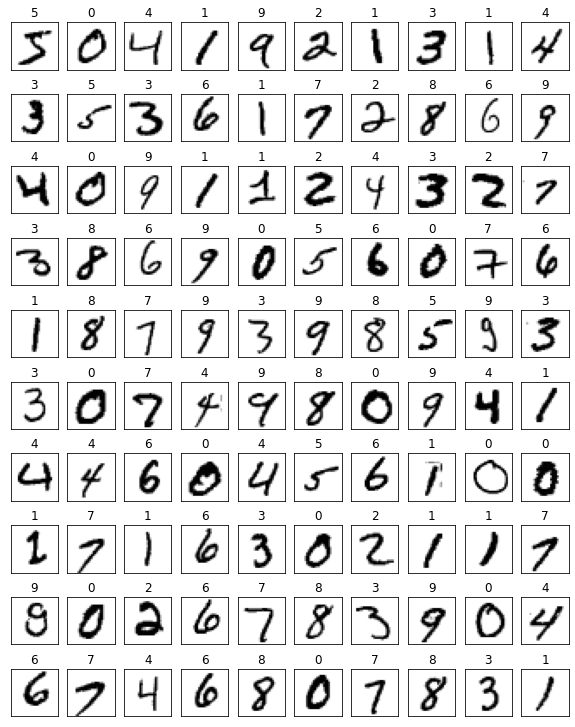

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 13))

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.binary)
    ax.set_title(f'{train_labels[i]}')

plt.show()

## 3. Build, train and predict for a simple DNN

### Sanitizing data

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras import models, layers

train_images = train_images.reshape((60000,28*28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_images = test_images.reshape((10000,28*28)).astype('float32') / 255
test_labels  = to_categorical(test_labels)

### DNN setting function

In [ ]:
def dnn_set(num_hidden, num_neuron, bach_sz, era,
            activ_hidden, activ_out, optimyz, cost_loss):
  namify = models.Sequential()
  namify.add(layers.Dense(num_neuron, activation=activ_hidden, input_shape=(28*28,)))
  for i in range(num_hidden - 1): 
    namify.add(layers.Dense(num_neuron, activation=activ_hidden))
  namify.add(layers.Dense(10, activation=activ_out))
  namify.compile(optimizer=optimyz, loss=cost_loss, metrics=['accuracy'])
  hist = namify.fit(train_images, train_labels, batch_size=bach_sz,
                    epochs=era, validation_split=1/6)
  return namify, hist

In [ ]:
netw = []
nhist = []

for x in [20, 50, 100]:
  a, b = dnn_set(1, x, 128, 30, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')
  netw.append(a)
  nhist.append(b)

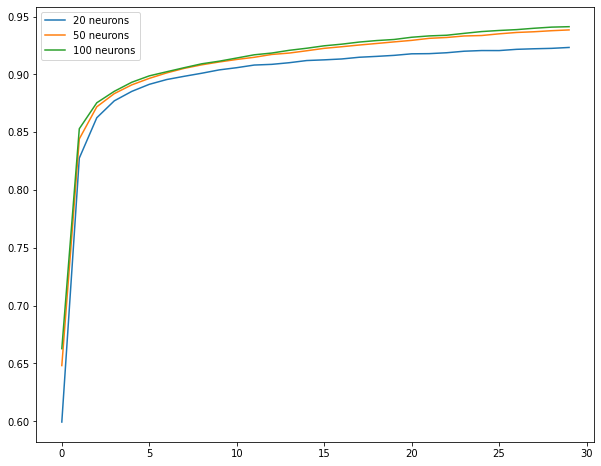

In [ ]:
plt.figure(figsize=(10,8))
for i, j in zip(range(3), [20,50,100]):
  plt.plot(nhist[i].history['accuracy'], label=f'{j} neurons')

plt.legend()
plt.show()

As seen from the graph, higher number of hidden neurons correlates to higher accuracy in this case.

In [ ]:
import numpy as np
from sklearn import metrics

pred = []
for i in range(3):
  c = netw[i].predict(test_images)
  c = np.argmax(c, axis=1)
  pred.append(c)

tr = np.argmax(test_labels, axis=1)

In [ ]:
for i, j in zip(range(3), [20,50,100]):
  print(f'For {j} hidden neurons', '.'*30)
  print(metrics.classification_report(tr, pred[i]))

For 20 hidden neurons ..............................
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.93      0.92      1010
           4       0.92      0.93      0.93       982
           5       0.92      0.86      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.93      0.94      1028
           8       0.89      0.90      0.89       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

For 50 hidden neurons ..............................
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98   

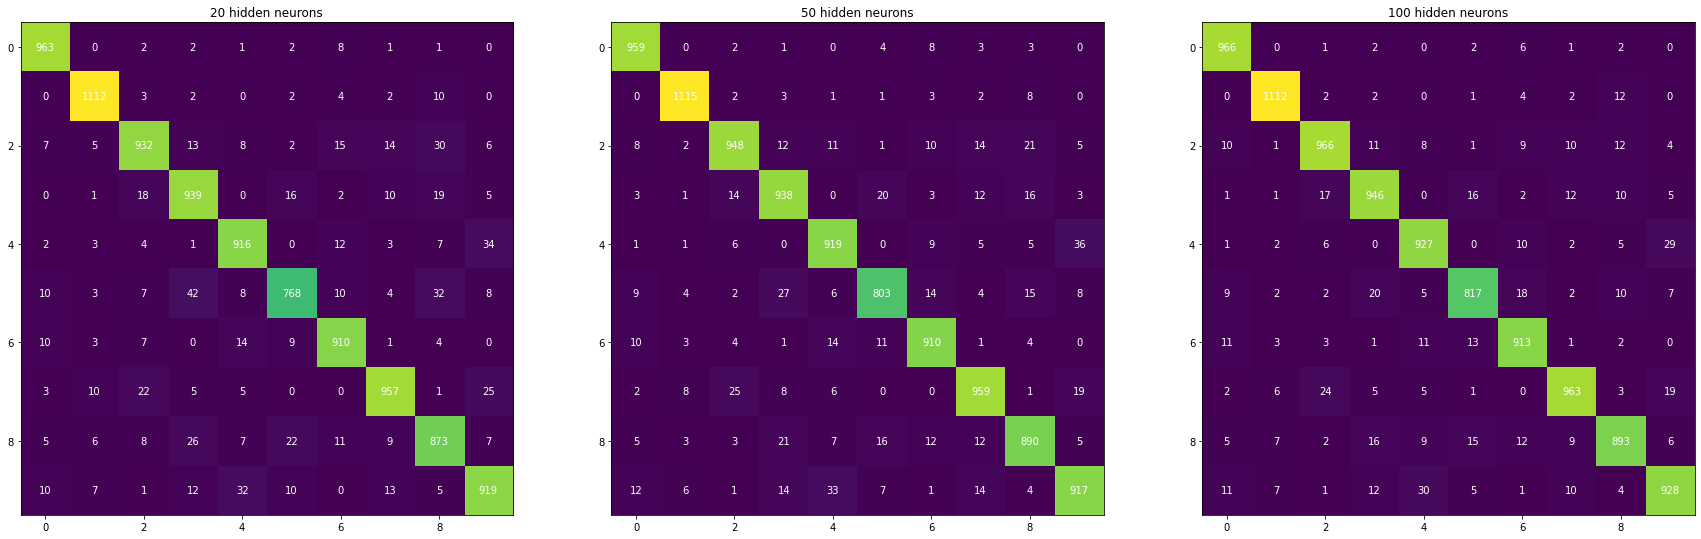

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
for i, j in zip(range(3), [20,50,100]):
  mat = metrics.confusion_matrix(tr, pred[i])
  axs[i].imshow(mat)
  axs[i].set_title(f'{j} hidden neurons')
  for l in range(10):
    for m in range(10):
      axs[i].text(m, l, mat[l, m],
                  ha='center', va='center', color='w')

The classification report and the confusion matrix both show that the classification accuracy increases with the increase of hidden neurons.

Also, from the confusion matrix, we can see that 3-5, 4-9 are some of the sets that confuse the neural network.

## 4. Activation and cost functions

I chose "softmax-crossentropy" and "sigmoid-mse" for the output layer activation and loss function. For each of the combinations, I am using the following activation functions for the hidden layer.

* relu
* tanh
* sigmoid
 

In [ ]:
netsof = []
sofhist = []

for x in ['relu', 'tanh', 'sigmoid']:
  a, b = dnn_set(1, 50, 128, 30, x, 'softmax', 'SGD', 'categorical_crossentropy')
  netsof.append(a)
  sofhist.append(b)

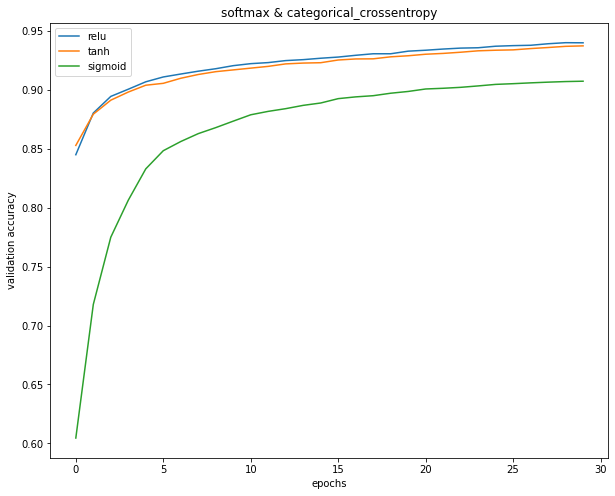

In [ ]:
plt.figure(figsize=(10,8))
for i, j in zip(range(3), ['relu', 'tanh', 'sigmoid']):
  plt.plot(sofhist[i].history['val_accuracy'], label=f'{j}')

plt.title('softmax & categorical_crossentropy')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

The relu and tanh activation functions had similar accuracies, but they both outperformed sigmoid.

In [ ]:
netsig = []
sighist = []

for x in ['relu', 'tanh', 'sigmoid']:
  a, b = dnn_set(1, 50, 128, 30, x, 'sigmoid', 'SGD', 'mean_squared_error')
  netsig.append(a)
  sighist.append(b)

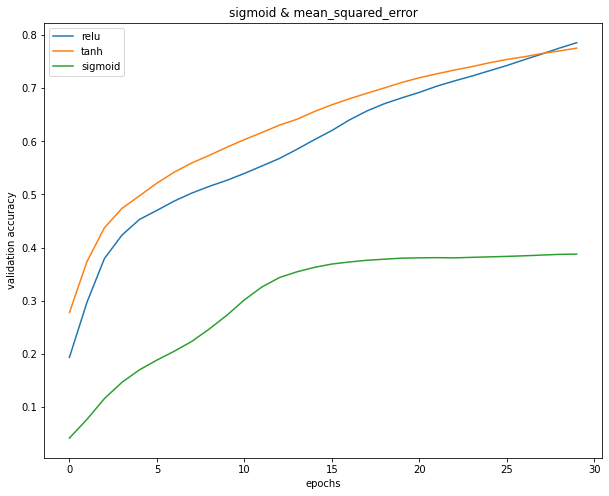

In [ ]:
plt.figure(figsize=(10,8))
for i, j in zip(range(3), ['relu', 'tanh', 'sigmoid']):
  plt.plot(sighist[i].history['val_accuracy'], label=f'{j}')

plt.title('sigmoid & mean_squared_error')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

The sigmoid activation function for the hidden layer did way worse than relu and tanh functions.

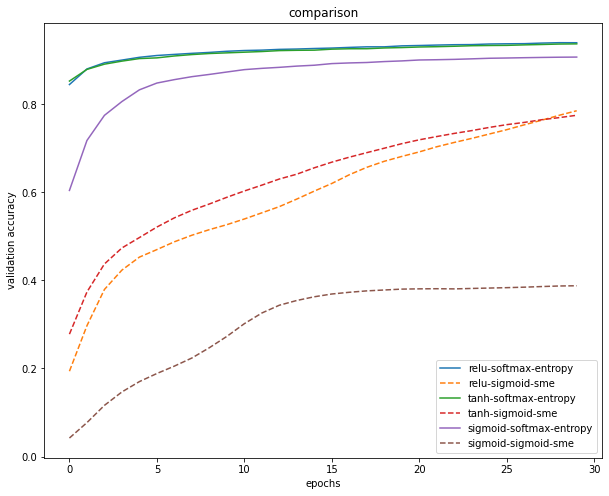

In [ ]:
plt.figure(figsize=(10,8))
for i, j in zip(range(3), ['relu', 'tanh', 'sigmoid']):
  plt.plot(sofhist[i].history['val_accuracy'], label=f'{j}-softmax-entropy')
  plt.plot(sighist[i].history['val_accuracy'], '--', label=f'{j}-sigmoid-sme')

plt.title('comparison')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

The relu activation gave better results for both softmax-entropy and sigmoid-sme combinations.

Also, if we look at all of the results at once, it becomes clear that softmax-entropy always outperforms sigmoid-sme in our case.

## 5. Hidden layers


In [ ]:
nethid = []
hidhist = []

for x in [3, 7, 11]:
  a, b = dnn_set(x, 25, 128, 30, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')
  nethid.append(a)
  hidhist.append(b)

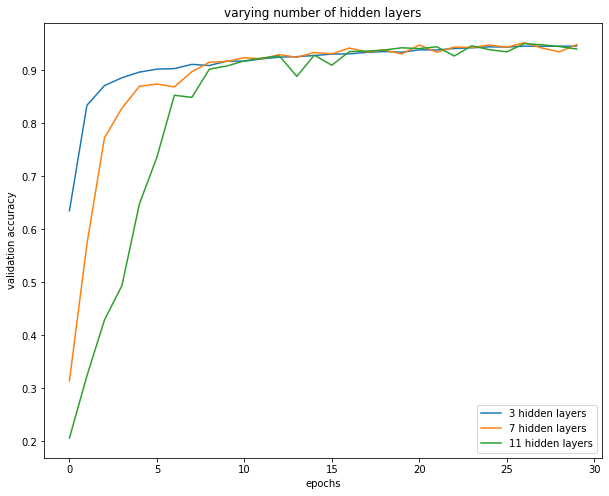

In [ ]:
plt.figure(figsize=(10,8))
for i, j in zip(range(3), [3, 7, 11]):
  plt.plot(hidhist[i].history['val_accuracy'], label=f'{j} hidden layers')

plt.title('varying number of hidden layers')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.legend()
plt.show()

For this particular problem, fewer hidden layers are performing better.

## 6. Overfitting and regularization

### Overfitting

In [ ]:
netover, overhist = dnn_set(5, 30, 32, 100, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')

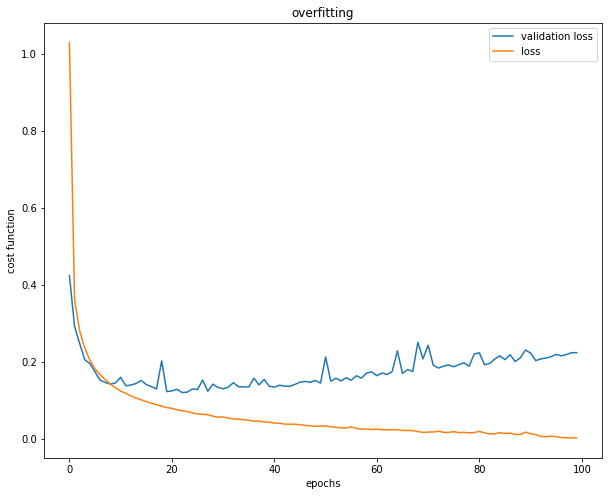

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(overhist.history['val_loss'], label='validation loss')
plt.plot(overhist.history['loss'], label='loss')

plt.title('overfitting')
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()
plt.show()

There is a significant amount of overfitting as the validation loss is increasing almost linearly.

### Early stopping

In [ ]:
from tensorflow.keras import callbacks

def dnn_es(num_hidden, num_neuron, bach_sz, era,
            activ_hidden, activ_out, optimyz, cost_loss):
  callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)
  namify = models.Sequential()
  namify.add(layers.Dense(num_neuron, activation=activ_hidden, input_shape=(28*28,)))
  namify.add(layers.Dense(10, activation=activ_out))
  namify.compile(optimizer=optimyz, loss=cost_loss, metrics=['accuracy'])
  hist = namify.fit(train_images, train_labels, batch_size=bach_sz,
                    epochs=era, callbacks=[callback], validation_split=1/6)
  return namify, hist

In [ ]:
netes, eshist = dnn_es(5, 30, 32, 100, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')

In [ ]:
len(eshist.history['val_loss'])

73

As we can see, the training was stopped early at epoch 73.

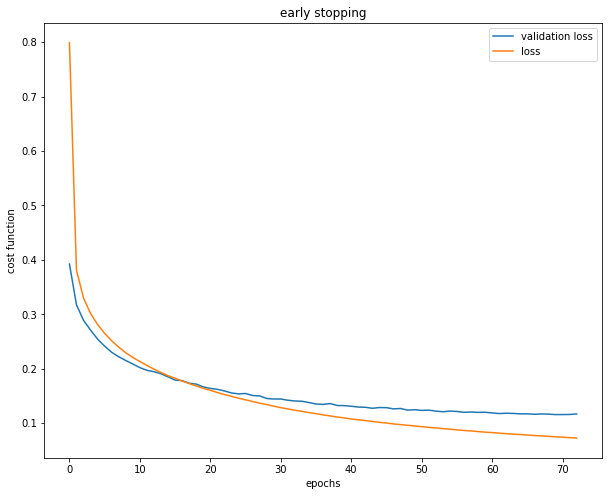

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(eshist.history['val_loss'], label='validation loss')
plt.plot(eshist.history['loss'], label='loss')

plt.title('early stopping')
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()
plt.show()

Early stopping works for avoiding overfitting.

### $L_2$ regularization

In [ ]:
from tensorflow.keras import regularizers

def dnn_l2(num_hidden, num_neuron, bach_sz, era,
            activ_hidden, activ_out, optimyz, cost_loss):
  namify = models.Sequential()
  namify.add(layers.Dense(num_neuron, activation=activ_hidden, input_shape=(28*28,),
                          kernel_regularizer=regularizers.l2(0.01)))
  namify.add(layers.Dense(10, activation=activ_out,
                          kernel_regularizer=regularizers.l2(0.01)))
  namify.compile(optimizer=optimyz, loss=cost_loss, metrics=['accuracy'])
  hist = namify.fit(train_images, train_labels, batch_size=bach_sz,
                    epochs=era, validation_split=1/6)
  return namify, hist

In [ ]:
netl2, l2hist = dnn_l2(5, 30, 32, 100, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')

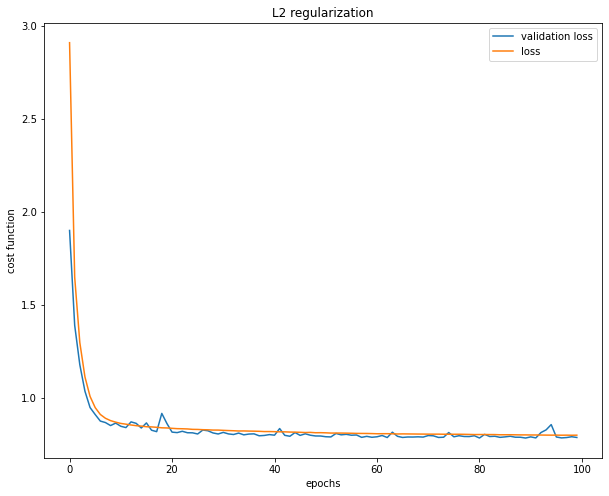

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(l2hist.history['val_loss'], label='validation loss')
plt.plot(l2hist.history['loss'], label='loss')

plt.title('L2 regularization')
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()
plt.show()

$L_2$ regularization practically stopped overfitting.

### $L_1$ regularization

In [ ]:
def dnn_l1(num_hidden, num_neuron, bach_sz, era,
            activ_hidden, activ_out, optimyz, cost_loss):
  namify = models.Sequential()
  namify.add(layers.Dense(num_neuron, activation=activ_hidden, input_shape=(28*28,),
                          kernel_regularizer=regularizers.l1(0.01)))
  namify.add(layers.Dense(10, activation=activ_out,
                          kernel_regularizer=regularizers.l1(0.01)))
  namify.compile(optimizer=optimyz, loss=cost_loss, metrics=['accuracy'])
  hist = namify.fit(train_images, train_labels, batch_size=bach_sz,
                    epochs=era, validation_split=1/6)
  return namify, hist

In [ ]:
netl1, l1hist = dnn_l1(5, 30, 32, 100, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')

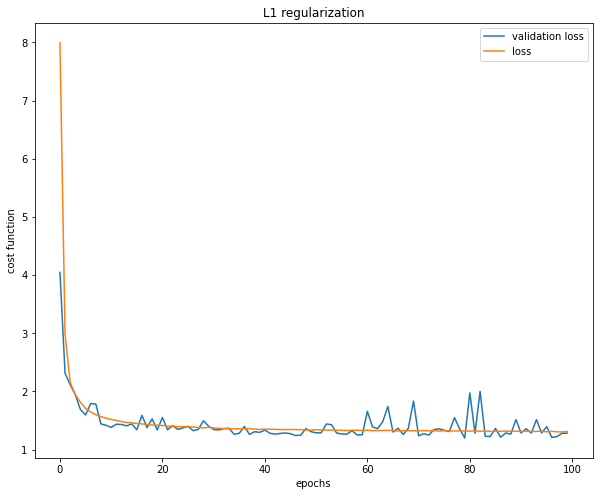

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(l1hist.history['val_loss'], label='validation loss')
plt.plot(l1hist.history['loss'], label='loss')

plt.title('L1 regularization')
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()
plt.show()

$L_1$ regularization is good but it oscillates a lot more than $L_2$.

### Dropout

In [ ]:
def dnn_drop(num_hidden, num_neuron, bach_sz, era,
            activ_hidden, activ_out, optimyz, cost_loss):
  namify = models.Sequential()
  namify.add(layers.Dense(num_neuron, activation=activ_hidden, input_shape=(28*28,)))
  namify.add(layers.Dropout(0.2))
  namify.add(layers.Dense(10, activation=activ_out))
  namify.compile(optimizer=optimyz, loss=cost_loss, metrics=['accuracy'])
  hist = namify.fit(train_images, train_labels, batch_size=bach_sz,
                    epochs=era, validation_split=1/6)
  return namify, hist

In [ ]:
netdrop, drophist = dnn_drop(5, 30, 32, 100, 'relu', 'softmax', 'SGD', 'categorical_crossentropy')

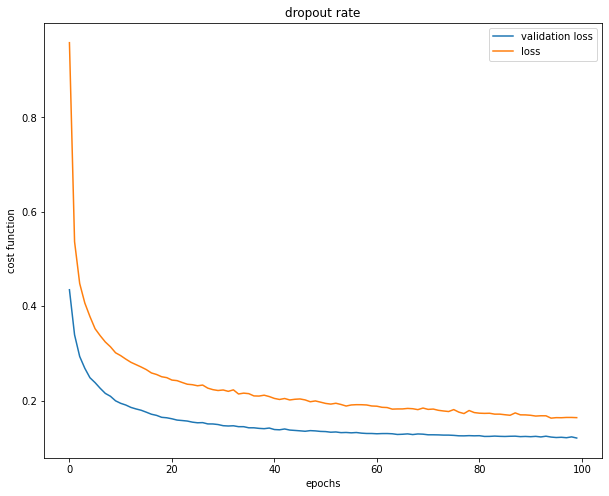

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(drophist.history['val_loss'], label='validation loss')
plt.plot(drophist.history['loss'], label='loss')

plt.title('dropout rate')
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()
plt.show()

A dropout rate of 0.2 completely stopped overfitting.

## 7. Hyperparameters tuning

I am tuning the model for the following hyperparameters.

* mini-batch size = [32, 64, 128]
* learning rate = [0.1, 0.01, 0.001]
* regularizatin = [0.1, 0.01, 0.001]
* dropout rate = [0.2, 0.4, 0.6]

In [ ]:
#!git clone https://github.com/keras-team/keras-tuner
#!pip install keras-tuner/

import keras_tuner as kt
from tensorflow import keras

In [ ]:
def dnn_builder(hp):
  namify = models.Sequential()

  hp_learning_rate = hp.Choice('learning_rate', values=[0.1,0.01,0.001])
  hp_reg_param = hp.Choice('reg_param', values=[0.1,0.01,0.001])
  hp_drop_rate =  hp.Choice('dropout_rate', values=[0.2,0.4,0.6])

  namify.add(layers.Dense(30, activation='relu', input_shape=(28*28,),
                          kernel_regularizer=regularizers.l2(hp_reg_param)))
  namify.add(layers.Dropout(hp_drop_rate))
  namify.add(layers.Dense(10, activation='softmax',
                          kernel_regularizer=regularizers.l2(hp_reg_param)))
  
  namify.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
                 loss='categorical_crossentropy', metrics=['accuracy'])

  return namify

In [ ]:
class atomTuner(kt.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', values=[32, 64, 128])
    super(atomTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
tuned = atomTuner(dnn_builder,
                   objective='val_accuracy',
                   project_name='cold_times',
                   max_trials=20)

In [ ]:
tuned.search(train_images, train_labels, epochs=10, validation_split=1/6)

Trial 20 Complete [00h 00m 11s]
val_accuracy: 0.9532999992370605

Best val_accuracy So Far: 0.953499972820282
Total elapsed time: 00h 06m 03s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hyper = tuned.get_best_hyperparameters()[0]

In [ ]:
for x in ['batch_size', 'learning_rate', 'reg_param', 'dropout_rate']:
  print(f'Best {x}: ', best_hyper.get(x))

Best batch_size:  128
Best learning_rate:  0.1
Best reg_param:  0.001
Best dropout_rate:  0.2


### Tuned hyperparameters

* best mini-batch size = 128
* best learning rate = 0.1
* best regularizatin = 0.001
* best dropout rate = 0.2